In [1]:
import matplotlib.pyplot as plt
import numpy as np

from mdcraft.algorithm.topology import create_atoms

/home/bye/miniconda3/envs/research/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
def draw_sphere(ax, x, y, z, r, c, *, a=1, n=10):
    u, v = np.mgrid[0:2 * np.pi:n * 2j, 0:np.pi:n * 1j]
    x = x + r * np.cos(u) * np.sin(v)
    y = y + r * np.sin(u) * np.sin(v)
    z = z + r * np.cos(v)
    ax.plot_surface(x, y, z, alpha=a, color=c)

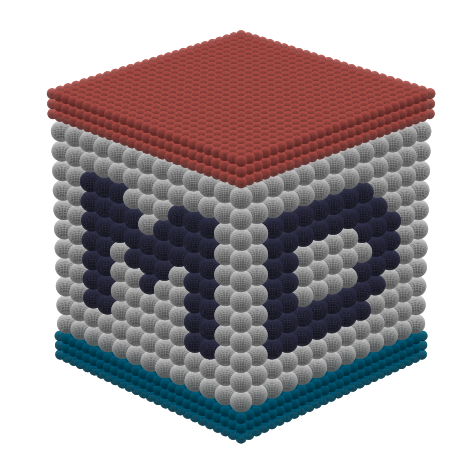

In [3]:
bottom_wall_points = create_atoms((13, 13, 1.5), lattice="cubic", length=0.5)[0]
solvent_points = create_atoms((13, 13, 11), lattice="cubic", length=1)[0] + (0, 0, 1.5)
top_wall_points = bottom_wall_points + (0, 0, 12.5)
letter_points = np.array((
    # left face -- letter M
    (12, 10, 9.5), (12, 9, 9.5), (12, 8, 9.5), (12, 4, 9.5), (12, 3, 9.5), (12, 2, 9.5),                                            # _000___000_
    (12, 10, 8.5), (12, 9, 8.5), (12, 8, 8.5), (12, 7, 8.5), (12, 5, 8.5), (12, 4, 8.5), (12, 3, 8.5), (12, 2, 8.5),                # _0000_0000_
    (12, 10, 7.5), (12, 9, 7.5), (12, 8, 7.5), (12, 7, 7.5), (12, 6, 7.5), (12, 5, 7.5), (12, 4, 7.5), (12, 3, 7.5), (12, 2, 7.5),  # _000000000_
    (12, 10, 6.5), (12, 9, 6.5), (12, 7, 6.5), (12, 6, 6.5), (12, 5, 6.5), (12, 3, 6.5), (12, 2, 6.5),                              # _00_000_00_
    (12, 10, 5.5), (12, 9, 5.5), (12, 6, 5.5), (12, 3, 5.5), (12, 2, 5.5),                                                          # _00__0__00_
    (12, 10, 4.5), (12, 9, 4.5), (12, 3, 4.5), (12, 2, 4.5),                                                                        # _00_____00_
    (12, 10, 3.5), (12, 9, 3.5), (12, 3, 3.5), (12, 2, 3.5),                                                                        # _00_____00_
    # right face -- letter D
    (10, 12, 9.5), (9, 12, 9.5), (8, 12, 9.5), (7, 12, 9.5), (6, 12, 9.5), (5, 12, 9.5), (4, 12, 9.5),                              # _0000000___
    (10, 12, 8.5), (9, 12, 8.5), (8, 12, 8.5), (7, 12, 8.5), (6, 12, 8.5), (5, 12, 8.5), (4, 12, 8.5), (3, 12, 8.5),                # _00000000__
    (10, 12, 7.5), (9, 12, 7.5), (4, 12, 7.5), (3, 12, 7.5), (2, 12, 7.5),                                                          # _00____000_
    (10, 12, 6.5), (9, 12, 6.5), (3, 12, 6.5), (2, 12, 6.5),                                                                        # _00_____00_
    (10, 12, 5.5), (9, 12, 5.5), (4, 12, 5.5), (3, 12, 5.5), (2, 12, 5.5),                                                          # _00____000_
    (10, 12, 4.5), (9, 12, 4.5), (8, 12, 4.5), (7, 12, 4.5), (6, 12, 4.5), (5, 12, 4.5), (4, 12, 4.5), (3, 12, 4.5),                # _00000000__
    (10, 12, 3.5), (9, 12, 3.5), (8, 12, 3.5), (7, 12, 3.5), (6, 12, 3.5), (5, 12, 3.5), (4, 12, 3.5),                              # _0000000___
))

# remove nonvisible points in inner layers
bottom_wall_points = bottom_wall_points[(bottom_wall_points[:, 0] > 11) | (bottom_wall_points[:, 1] > 11)]
solvent_points = solvent_points[(solvent_points[:, 0] > 10) | (solvent_points[:, 1] > 10)]
top_wall_points = top_wall_points[(top_wall_points[:, 0] > 11) | (top_wall_points[:, 1] > 11) | (top_wall_points[:, 2] == 13.5)]

# remove overlapped points
for letter_point in letter_points:
    solvent_points = solvent_points[~(solvent_points == letter_point).all(axis=1)]

radii = (0.25, 0.5, 0.25, 0.5)
base_colors = np.array(((0, 128, 168), (256, 256, 256), (240, 112, 104), (64, 64, 96)), dtype=float) / 256

fig = plt.figure()
ax = fig.add_subplot(projection="3d")
ax.view_init(22.5, 45, 0)
ax.set_axis_off()
ax.set_box_aspect(np.array((12, 12, 13)) / 13)
ax.set_xlim((0, 12))
ax.set_ylim((0, 12))
ax.set_zlim((0, 13))
for i, (points, radius, base_color) in enumerate(
        zip(
            (bottom_wall_points, solvent_points, top_wall_points, letter_points),
            radii,
            base_colors
        )
    ):
    for point in points:
        draw_sphere(ax, *point, radius, base_color, n=20)
fig.tight_layout()
plt.savefig("logo.png", dpi=600, bbox_inches="tight", transparent=True)
plt.show()